# **Project Code: For Different Tree Boosts**





## Comparative analysis of different tree Boosts for IDS on Intrusion Detection

## Tree Boosts to Be Compared:

# 1.   XGB Boost
# 2.   LGB Boost
# 3.   Cat Boost
# 4.   Extra Trees
# 5.   Random forests 
# 6.   Decision trees



# Import Libraries

1.   Pandas
2.   Numpy
3.   matplotlib
4.   Libraries for different Tree Models ( LightGBM,xgBoost,CatBoost)
5.   other libraries as needed.



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
!pip3 install catboost
import catboost as cbt
import xgboost as xgb
import time
!pip3 install river
from river import stream
from statistics import mode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 4.7 MB/s 
     |████████████████████████████████| 17.3 MB 50.7 MB/s 
     |████████████████████████████████| 33.8 MB 89.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA SET TO BE USED: CICIDS2017 dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ISM/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km.csv")

In [ ]:
df.Label.value_counts()

0    18225
3     3042
6     2180
1     1966
5     1255
2       96
4       36
Name: Label, dtype: int64

In [ ]:
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7.499999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7.249999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Corresponding Attack Types:

1.   0    BENIGN   18225
2.   1    Bot     1966
3.   2    BruteForce   96
4.   3    DoS     3042
5.   4    Infiltration   36
6.   5    PortScan   1255
7.   6    WebAttack   2180 













# Spliting train set and test set for training purpose.
train_size = 0.8, test_size = 0.2



In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0) #shuffle=False

# SMOTE to solve class-imbalance

In [ ]:
pd.Series(y_train).value_counts()

0    14569
3     2430
6     1728
1     1579
5     1024
2       82
4       28
Name: Label, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000,4:1000})

In [ ]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train).value_counts()

0    14569
3     2430
6     1728
1     1579
5     1024
2     1000
4     1000
Name: Label, dtype: int64

# Machine Learning (ML) model training
Training three base learners: LightGBM, XGBoost, CatBoost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       1.00      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      0.99      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of LightGBM: 0.9973880597014926
Precision of LightGBM: 0.9973967119612819
Recall of LightGBM: 0.9973880597014926
Average F1 of LightGBM: 0.9973612766651317
F1 of LightGBM for each type of attack: [0.99836021 0.99481865 1.         0.99754702 0.85714286 0.99354839
 0.99555556]


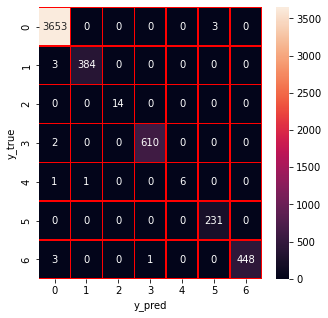

CPU times: user 18.8 s, sys: 184 ms, total: 19 s
Wall time: 10 s


In [ ]:
%%time
# Train the LightGBM algorithm
import lightgbm as lgb
lg = lgb.LGBMClassifier()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
lg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3656
           1       0.99      0.96      0.97       387
           2       0.87      0.93      0.90        14
           3       0.96      0.98      0.97       612
           4       1.00      0.50      0.67         8
           5       0.99      0.99      0.99       231
           6       0.99      0.87      0.92       452

    accuracy                           0.98      5360
   macro avg       0.97      0.89      0.91      5360
weighted avg       0.98      0.98      0.98      5360

Accuracy of XGBoost: 0.9755597014925373
Precision of XGBoost: 0.9758482606600912
Recall of XGBoost: 0.9755597014925373
Average F1 of XGBoost: 0.9751364180942107
F1 of XGBoost for each type of attack: [0.98264171 0.97375328 0.89655172 0.96920583 0.66666667 0.98920086
 0.92434988]


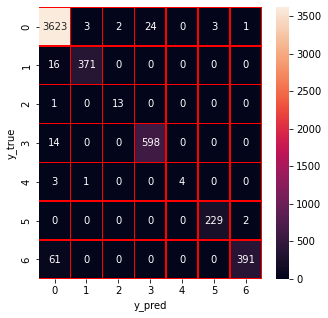

CPU times: user 38.7 s, sys: 175 ms, total: 38.9 s
Wall time: 39 s


In [ ]:
%%time
# Train the XGBoost algorithm
import xgboost as xgb
xg = xgb.XGBClassifier()

X_train_x = X_train.values
X_test_x = X_test.values

xg.fit(X_train_x, y_train)

y_pred = xg.predict(X_test_x)
print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       0.99      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      0.99      0.99       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of CatBoost: 0.9966417910447761
Precision of CatBoost: 0.9966457193764396
Recall of CatBoost: 0.9966417910447761
Average F1 of CatBoost: 0.99661603515491
F1 of CatBoost for each type of attack: [0.99781241 0.99353169 1.         0.99673203 0.85714286 0.99137931
 0.9944629 ]


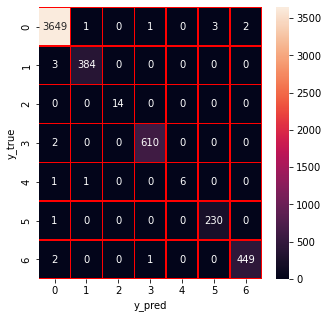

CPU times: user 3min 50s, sys: 1.59 s, total: 3min 51s
Wall time: 2min 3s


In [ ]:
%%time
# Train the CatBoost algorithm
import catboost as cbt
cb = cbt.CatBoostClassifier(verbose=0,boosting_type='Plain')
#cb = cbt.CatBoostClassifier()

cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of CatBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of CatBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of CatBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of CatBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of CatBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
cb_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 0.9899253731343284
Precision of RF: 0.9899339378801721
Recall of RF: 0.9899253731343284
F1-score of RF: 0.9898210890672914
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3656
           1       0.99      0.98      0.99       387
           2       1.00      1.00      1.00        14
           3       0.99      0.99      0.99       612
           4       1.00      0.62      0.77         8
           5       0.99      1.00      0.99       231
           6       0.99      0.95      0.97       452

    accuracy                           0.99      5360
   macro avg       0.99      0.94      0.96      5360
weighted avg       0.99      0.99      0.99      5360



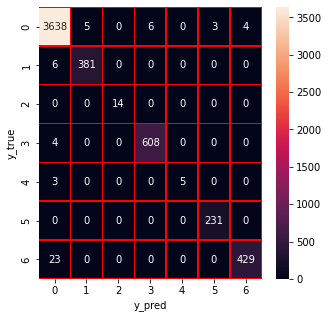

CPU times: user 4.59 s, sys: 139 ms, total: 4.72 s
Wall time: 4.61 s
Compiler : 125 ms


In [23]:
%%time
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.9929104477611941
Precision of DT: 0.9928743455303658
Recall of DT: 0.9929104477611941
F1-score of DT: 0.9928630672159569
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3656
           1       0.99      0.99      0.99       387
           2       0.93      0.93      0.93        14
           3       0.99      1.00      0.99       612
           4       0.83      0.62      0.71         8
           5       0.99      1.00      0.99       231
           6       0.98      0.99      0.98       452

    accuracy                           0.99      5360
   macro avg       0.96      0.93      0.94      5360
weighted avg       0.99      0.99      0.99      5360



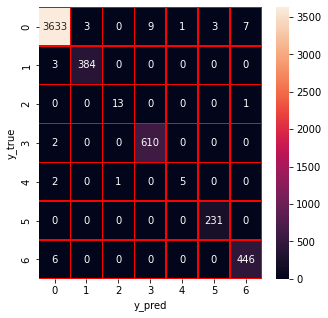

CPU times: user 1.33 s, sys: 68 ms, total: 1.4 s
Wall time: 1.44 s


In [22]:
%%time
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.9873134328358208
Precision of ET: 0.9873029820354025
Recall of ET: 0.9873134328358208
F1-score of ET: 0.9872357717235625
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3656
           1       0.96      0.97      0.97       387
           2       0.81      0.93      0.87        14
           3       0.98      0.99      0.99       612
           4       0.80      0.50      0.62         8
           5       0.99      1.00      0.99       231
           6       0.98      0.97      0.98       452

    accuracy                           0.99      5360
   macro avg       0.93      0.91      0.91      5360
weighted avg       0.99      0.99      0.99      5360



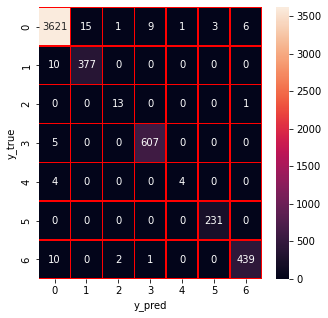

CPU times: user 3.68 s, sys: 135 ms, total: 3.81 s
Wall time: 3.81 s


In [26]:
%%time
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()